In [100]:
import xarray as xr
import rasterio
import numpy as np
import matplotlib.pyplot as plt

In [101]:
# ds = xr.open_dataset('./agg_Nijmegen_July2017.nc')
# ds['count'].rio.to_raster('./agg_Nijmegen_July2017.tiff')

In [102]:
# ds = xr.open_dataset('./agg_Nijmegen_week18_2022.nc')
# ds['count'].rio.to_raster('./agg_Nijmegen_week18_2022.tiff')

In [104]:
ds_mask = rasterio.open('./diff-nijmegen-week34-week18-mask.tif')
ds_rgb = rasterio.open('./diff-nijmegen-week34-week18-07.tif')
mask = (ds_mask.read(1) * 255).astype('uint8')

In [130]:
ds_rgba = rasterio.open(
    './diff-nijmegen-week34-week18-rgba.tif', 
    width=ds_rgb.width, 
    height=ds_rgb.height, 
    count=4,
    dtype='uint8', 
    transform=ds_rgb.transform, 
    crs=ds_rgb.crs,
    mode='w'
)


In [131]:
ds_rgb.read().shape
rgba = np.concatenate([ds_rgb.read(), mask[np.newaxis, ...]], axis=0)
ds_rgba.write(rgba)
ds_rgba.close()

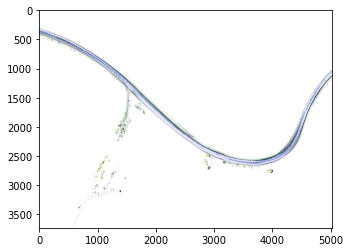

In [128]:
plt.imshow(np.swapaxes(np.swapaxes(rgba, 0, 2), 0, 1))

Affine(2.0, 0.0, 645612.0,
       0.0, -2.0, 6778430.0)